In [25]:
import json
import tabulate

def trace_match(metrics, testname):
    return metrics[testname]['summary']['trace_match']

testname_to_url_domain = {
    'bullet': ('https://magnum.graphics/showcase/bullet/', 'Simulator'),
    'factorial': ('https://www.hellorust.com/demos/factorial/index.html', 'Mathematics'),
    'ffmpeg': ('https://w3reality.github.io/async-thread-worker/examples/wasm-ffmpeg/index.html', 'Media'),
    'fractals': ('https://raw-wasm.pages.dev/', 'Graphics'),
    'funky-kart': ('https://www.funkykarts.rocks/demo.html', 'Video game'),
    'game-of-life': ('https://playgameoflife.com/', 'Video game'),
    'gotemplate': ('https://gotemplate.io/', 'Progr. lang.'),
    'hnset-bench': ('https://raw.githack.com/gorhill/uBlock/master/docs/tests/hnset-benchmark.html', 'Benchmark'),
    'hydro': ('https://cselab.github.io/aphros/wasm/hydro.html', 'Simulator'),
    'jqkungfu': ('http://jqkungfu.com/', 'Progr. lang.'),
    'lichess': ('https://lichess.org/analysis', 'Video game'),
    'mandelbrot': ('http://whealy.com/Rust/mandelbrot.html', 'Graphics'),
    'ogv': ('https://brionv.com/misc/ogv.js/demo/', 'Media'),
    'onnxjs': ('https://microsoft.github.io/onnxjs-demo/#/', 'Machine learning'),
    'pacalc': ('http://whealy.com/acoustics/PA_Calculator/index.html', 'Mathematics'),
    'parquet': ('https://google.github.io/filament/webgl/parquet.html', 'Graphics'),
    'playnox': ('https://playnox.xyz/', 'Video game'),
    'roslyn': ('http://roslynquoter-wasm.platform.uno/', 'Progr. lang.'),
    'rustpython': ('https://rustpython.github.io/demo/', 'Progr. lang.'),
    'sandspiel': ('https://sandspiel.club/', 'Video game'),
    'sqlgui': ('http://kripken.github.io/sql.js/examples/GUI/', 'Progr. lang.'),
    'sqlpractice': ('https://www.sql-practice.com', 'Progr. lang.'),
    'takahirox': ('https://takahirox.github.io/WebAssembly-benchmark/', 'Benchmark'),
    'fib': ('https://takahirox.github.io/WebAssembly-benchmark/tests/fib.html', 'Benchmark'),
    'multiplyInt': ('https://takahirox.github.io/WebAssembly-benchmark/tests/multiplyInt.html', 'Benchmark'),
    'multiplyDouble': ('https://takahirox.github.io/WebAssembly-benchmark/tests/multiplyDouble.html', 'Benchmark'),
    'image-convolute': ('https://takahirox.github.io/WebAssembly-benchmark/tests/imageConvolute.html', 'Benchmark'),
    'tic-tac-toe': ('https://sepiropht.github.io/tic-tac-toe-wasm/', 'Video game'),
    'timestretch': ('https://superpowered.com/js-wasm-sdk/example_timestretching/', 'Media'),
    'waforth': ('https://el-tramo.be/waforth', 'Progr. lang.'),
    'wasmsh': ('https://webassembly.sh/', 'Utility'),
    'wheel': ('https://boyan.io/wasm-wheel/', 'Benchmark'),
    'guiicons': ('https://raylibtech.itch.io/rguiicons', 'Utility'),
    'riconpacker': ('https://raylibtech.itch.io/riconpacker', 'Utility'),
    'rtexviewer': ('https://raylibtech.itch.io/rtexviewer', 'Utility'),
    'boa': ('https://boajs.dev/boa/playground/', 'Progr. lang.'),
    'commanderkeen': ('https://www.jamesfmackenzie.com/chocolatekeen', 'Video game'),
    'figma-startpage': ('https://www.figma.com', 'Graphics'),
    'jsc': ('https://mbbill.github.io/JSC.js/demo/index.html', 'Progr. lang.'),
    'pathfinding': ('https://jacobdeichert.github.io/wasm-astar/', 'Benchmark'),
    'livesplit': ('https://one.livesplit.org/', 'Utility'),
    'rfxgen': ('https://raylibtech.itch.io/rfxgen', 'Utility'),
    'rguilayout': ('https://raylibtech.itch.io/rguilayout', 'Utility'),
    'rguistyler': ('https://raylibtech.itch.io/rguistyler', 'Utility'),
    'rtexpacker': ('https://raylibtech.itch.io/rtexpacker', 'Utility'),
}

with open('metrics.json', 'r') as f: metrics = json.load(f)

# RQ 1-1
rq1_results = [['Name', 'URL', 'Domain', 'Success']] + sorted([[testname, testname_to_url_domain[testname][0], testname_to_url_domain[testname][1], 'cmark' if trace_match(metrics, testname) else ''] for testname in metrics])
latex_table = tabulate.tabulate(rq1_results, tablefmt="latex")
latex_table = latex_table.replace('cmark', '\\cmark')
print(latex_table)

\begin{tabular}{llll}
\hline
 Name            & URL                                                                             & Domain           & Success \\
 boa             & https://boajs.dev/boa/playground/                                               & Progr. lang.     & \cmark   \\
 bullet          & https://magnum.graphics/showcase/bullet/                                        & Simulator        & \cmark   \\
 commanderkeen   & https://www.jamesfmackenzie.com/chocolatekeen                                   & Video game       & \cmark   \\
 factorial       & https://www.hellorust.com/demos/factorial/index.html                            & Mathematics      & \cmark   \\
 ffmpeg          & https://w3reality.github.io/async-thread-worker/examples/wasm-ffmpeg/index.html & Media            & \cmark   \\
 fib             & https://takahirox.github.io/WebAssembly-benchmark/tests/fib.html                & Benchmark        & \cmark   \\
 figma-startpage & https://www.figma.com        

In [3]:
engine_kind = ['sm', 'sm-base', 'sm-opt', 'v8', 'v8-liftoff', 'v8-turbofan', 'jsc', 'jsc-int','jsc-bbq','jsc-omg', 'wizeng','wizeng-int','wizeng-jit','wizeng-dyn','wasmtime','wasmer','wasmer-base']
# engine_kind = ['sm', 'v8', 'jsc', 'wasmtime','wasmer', 'wizeng-int','wizeng-jit','wizeng-dyn']
print('RQ1-2: Portability Experiment')
def get_engine_runtime(testname):
    return [metrics[testname]['replay_metrics'][engine]['benchmark'].get('runtime') for engine in engine_kind]
rq22_results = [['Test name', *engine_kind]] + sorted([[testname, *get_engine_runtime(testname)] for testname in metrics if trace_match(metrics, testname) ])
print(tabulate.tabulate(rq22_results, tablefmt="latex"))

RQ1-2: Portability Experiment
\begin{tabular}{llllllllllllllllll}
\hline
 Test name       & sm       & sm-base  & sm-opt   & v8       & v8-liftoff & v8-turbofan & jsc      & jsc-int   & jsc-bbq  & jsc-omg  & wizeng    & wizeng-int & wizeng-jit & wizeng-dyn & wasmtime & wasmer   & wasmer-base \\
 boa             & 0.069655 & 0.058123 & 0.069509 & 0.061664 & 0.060691   & 0.43996     & 0.071507 & 0.078304  & 0.108706 & 0.071553 & 0.148607  & 0.147258   & 0.555378   & 0.194865   & 0.068475 & 0.061453 & 0.090795    \\
 bullet          & 0.044401 & 0.041345 & 0.045462 & 0.035949 & 0.042494   & 0.136931    & 0.044519 & 0.348254  & 0.053636 & 0.0455   & 0.477937  & 0.477395   & 0.099555   & 0.068403   & 0.091759 & 0.078594 & 0.098639    \\
 commanderkeen   & 2.568928 & 1.571663 & 2.63019  & 0.898724 & 1.906273   & 1.403794    & 1.191455 & 6.128721  & 2.064911 & 1.193066 & 10.649356 & 10.650679  & 9.459649   & 8.425325   & 1.414775 & 1.477285 & 2.245488    \\
 factorial       & 0.013993 & 0.011

flaky result for record fib, 0th, skipping in geomean calculation
\begin{tabular}{lr}
\hline
 boa             & 20.2271   \\
 rfxgen          &  8.4579   \\
 ffmpeg          &  8.45611  \\
 jsc             &  7.98338  \\
 funky-kart      &  7.4165   \\
 sandspiel       &  7.08119  \\
 jqkungfu        &  6.11443  \\
 mandelbrot      &  5.82138  \\
 commanderkeen   &  5.50573  \\
 rguistyler      &  5.17763  \\
 rtexpacker      &  4.47161  \\
 bullet          &  4.22564  \\
 rtexviewer      &  4.07697  \\
 pathfinding     &  3.81436  \\
 rguilayout      &  3.62899  \\
 fib             &  3.59232  \\
 guiicons        &  3.52998  \\
 riconpacker     &  3.13307  \\
 hydro           &  3.12681  \\
 figma-startpage &  2.48675  \\
 sqlpractice     &  2.30906  \\
 multiplyInt     &  1.1474   \\
 multiplyDouble  &  1.09612  \\
 pacalc          &  1.08887  \\
 factorial       &  0.865821 \\
 sqlgui          &  0.863482 \\
 game-of-life    &  0.780817 \\
\hline
\end{tabular}


<Figure size 640x480 with 0 Axes>

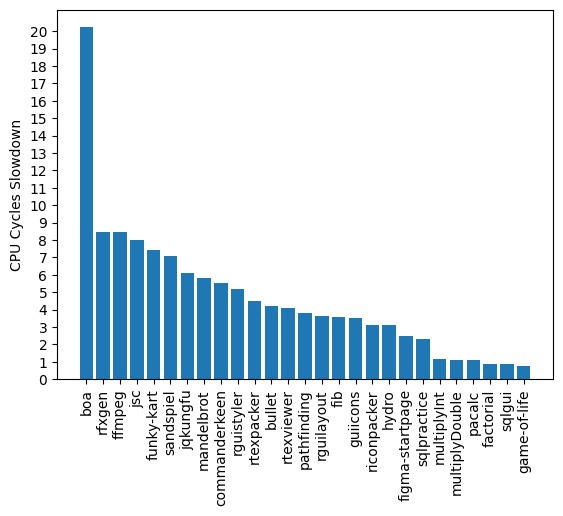

In [2]:
import tabulate, scipy.stats, json, numpy as np
import matplotlib.pyplot as plt

# RQ 2-1

with open('metrics.json', 'r') as f: 
    metrics = json.load(f)
    del metrics['parquet'] # record fails
def trace_match(metrics, testname):return metrics[testname]['summary']['trace_match']


def get_cycles_slowdown(testname):
    original_cycles = []
    record_cycles = []
    for i in range(10):
        cycles_sum = sum(metrics[testname]['record_metrics']['original'][i]['cycles']) 
        if not cycles_sum > 0:
            print(f"flaky result for original {testname}, {i}th, skipping in geomean calculation")
            continue
        original_cycles.append(cycles_sum)
    for i in range(10):
        cycles_sum = sum(metrics[testname]['record_metrics']['instrumented'][i]['cycles']) 
        if not cycles_sum > 0:
            print(f"flaky result for record {testname}, {i}th, skipping in geomean calculation")
            continue
        record_cycles.append(cycles_sum)
    return scipy.stats.gmean(record_cycles) / scipy.stats.gmean(original_cycles)

table = sorted([(testname, get_cycles_slowdown(testname)) for testname in metrics if trace_match(metrics, testname)], key=lambda x: x[1], reverse=True)
print(tabulate.tabulate(table, tablefmt="latex"))

plt.figure()
testname_gmean_pairs = [(row[0], row[-1]) for row in table]
testname_gmean_pairs.sort(key=lambda pair: pair[1], reverse=True)
gmean_values = [pair[1] for pair in testname_gmean_pairs]
test_names = [pair[0] for pair in testname_gmean_pairs]
plt.figure()
plt.bar(test_names, gmean_values, label='Geometric Mean')
plt.xticks(rotation=90)
plt.yticks(range(int(min(gmean_values)), int(max(gmean_values)) + 1))
plt.ylabel('CPU Cycles Slowdown')
plt.savefig("/Users/don/Desktop/wasm-r3-paper/oopsla/figures/perf-record.pdf", bbox_inches='tight')

Error in sqlpractice: 'instr_dynamic_replay'


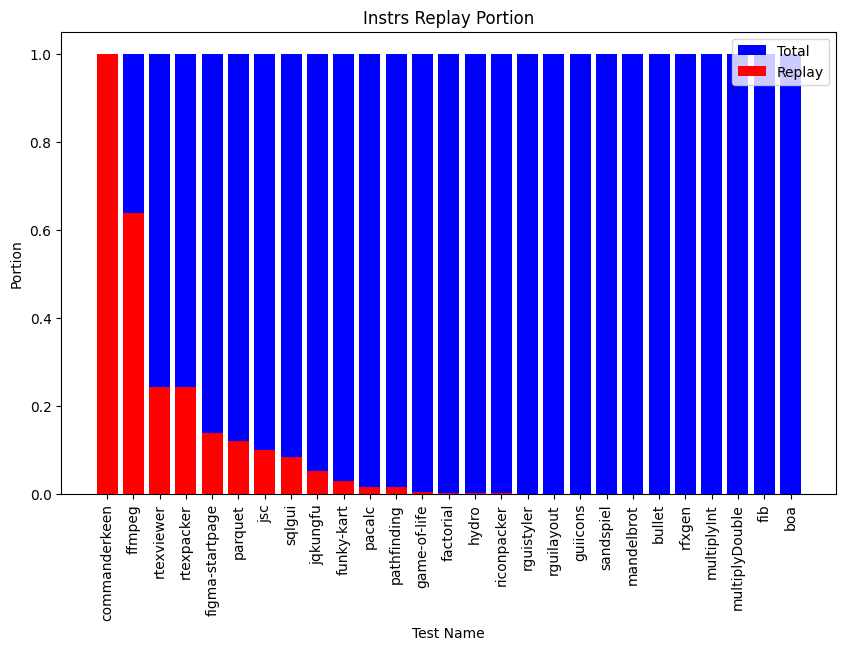

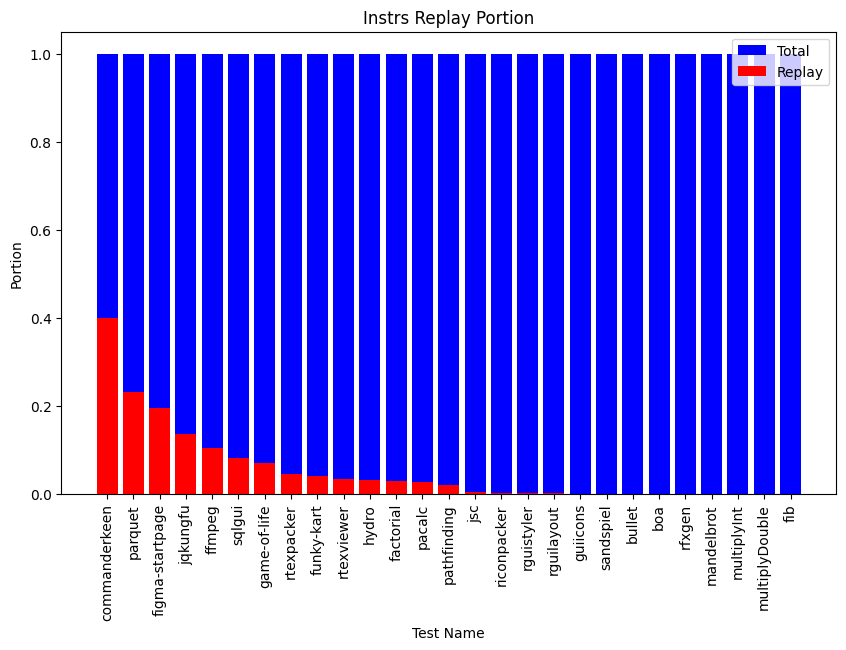

In [46]:
# RQ 2-2
import tabulate, scipy.stats, json, numpy as np
import matplotlib.pyplot as plt

with open('metrics.json', 'r') as f: metrics = json.load(f)
def trace_match(metrics, testname): return metrics[testname]['summary']['trace_match']

# Retrieve the necessary data
# "instrs_dynamic_total": 116,
# "instr_dynamic_replay": 74,
# "ticks_total": 58064,
# "ticks_replay": 6070


data = {}
# Calculate the portion of replay out of total for instrs and ticks
for testname in metrics:
    if not trace_match(metrics, testname): continue
    try: 
        data[testname] = {}
        data[testname]['instrs_replay_portion'] = metrics[testname]['summary']['instr_dynamic_replay'] / metrics[testname]['summary']['instrs_dynamic_total']
        data[testname]['ticks_replay_portion'] = metrics[testname]['summary']['ticks_replay'] / metrics[testname]['summary']['ticks_total']
    except Exception as e:
        del data[testname]
        print(f"Error in {testname}: {e}")

# Plot the portions
instrs_replay_portions = [[testname, data[testname]['instrs_replay_portion']] for testname in data]
instrs_replay_portions.sort(key=lambda x: x[1], reverse=True)
ticks_replay_portions = [[testname, data[testname]['ticks_replay_portion']] for testname in data]
ticks_replay_portions.sort(key=lambda x: x[1], reverse=True)

# Plot the ticks portions
# Plot the instrs portions
plt.figure(figsize=(10, 6))
plt.bar([a for a, b in instrs_replay_portions], [1]*len(instrs_replay_portions), label='Total', color='blue')
plt.bar([a for a, b in instrs_replay_portions], [b for a, b in instrs_replay_portions], label='Replay', color='red')
plt.xlabel('Test Name')
plt.xticks(rotation=90)
plt.ylabel('Portion')
plt.title('Instrs Replay Portion')
plt.legend()
plt.show()
# # Plot the instrs portions
# Plot the instrs portions
plt.figure(figsize=(10, 6))
plt.bar([a for a, b in ticks_replay_portions], [1]*len(ticks_replay_portions), label='Total', color='blue')
plt.bar([a for a, b in ticks_replay_portions], [b for a, b in ticks_replay_portions], label='Replay', color='red')
plt.xlabel('Test Name')
plt.xticks(rotation=90)
plt.ylabel('Portion')
plt.title('Instrs Replay Portion')
plt.legend()
plt.show()

In [5]:
import json
import tabulate, scipy.stats

with open('metrics.json', 'r') as f: metrics = json.load(f)
print('RQ3: Effectiveness of Trace Reduction')

print('TODO')

RQ3: Effectiveness of Trace Reduction
TODO


In [8]:
import json
import tabulate
with open('metrics.json', 'r') as f:
    metrics = json.load(f)

print('RQ4: Effectiveness of Replay Optimization')

def get_metric(testname, opt, time):
    metric = metrics[testname]['replay_metrics']['wizeng-int'][opt]
    if len(metric) == 0:
        return 0
    else:
        return metric[time]

print('RQ4-1: Load time')
time = 'load:time_us'
rq4_results = [['Test name', 'noopt time', 'split time', 'merge time', 'fullopt time']] + [[testname, get_metric(testname, 'noopt', time), get_metric(testname, 'split', time), get_metric(testname, 'merge', time), get_metric(testname, 'benchmark', time)] for testname in metrics if trace_match(metrics, testname)]
print(tabulate.tabulate(rq4_results, tablefmt="latex"))

print('RQ4-2: Validate time')
time = 'validate:time_us'
rq4_results = [['Test name', 'noopt time', 'split time', 'merge time', 'fullopt time']] + [[testname, get_metric(testname, 'noopt', time), get_metric(testname, 'split', time), get_metric(testname, 'merge', time), get_metric(testname, 'benchmark', time)] for testname in metrics if trace_match(metrics, testname)]
print(tabulate.tabulate(rq4_results, tablefmt="latex"))

print('RQ4-3: Main time')
time = 'main:time_us'
rq4_results = [['Test name', 'noopt time', 'split time', 'merge time', 'fullopt time']] + [[testname, get_metric(testname, 'noopt', time), get_metric(testname, 'split', time), get_metric(testname, 'merge', time), get_metric(testname, 'benchmark', time)] for testname in metrics if trace_match(metrics, testname)]
print(tabulate.tabulate(rq4_results, tablefmt="latex"))

RQ4: Effectiveness of Replay Optimization
RQ4-1: Load time
\begin{tabular}{lllll}
\hline
 Test name       & noopt time & split time & merge time & fullopt time \\
 bullet          & 12240      & 12296      & 11755      & 11719        \\
 jsc             & 95584      & 95274      & 88448      & 88416        \\
 rguistyler      & 9086       & 9090       & 8857       & 8899         \\
 video           & 399        & 398        & 413        & 417          \\
 multiplyDouble  & 2207       & 2293       & 2179       & 2190         \\
 factorial       & 798        & 797        & 792        & 792          \\
 commanderkeen   & 77235      & 77433      & 65214      & 65065        \\
 mandelbrot      & 14804      & 14288      & 1535       & 1537         \\
 sqlpractice     & 0          & 0          & 0          & 0            \\
 rguilayout      & 8830       & 8622       & 8491       & 8606         \\
 riconpacker     & 8577       & 8665       & 8385       & 8444         \\
 figma-startpage & 3960